In [87]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import geopandas as gpd

In [88]:
df = pd.read_csv('indicadoresmigracion.csv')

In [89]:
df.shape

(4557, 13)

In [90]:
df.head()

,Año,Country Name,Country Code,Crecimiento del PIB (anual %),Tasa de desempleo (%),"Inflación, deflactor PIB (anual %)","Homicidios intencionales (por 100,000 personas)",Muertes por conflicto (nro personas),Control de Corrupción (rango percentil),Emisiones de CO2 (kt),Esperanza de vida al nacer (años),Migración neta,Población total
0,2000,Argentina,ARG,-0.79%,15.00%,1.04%,0.00,0,52.13,"132,265.5",73.93,"-22,770.0","37,070,774.0"
1,2000,Australia,AUS,3.90%,6.28%,2.56%,1.90,0,93.62,"339,422.8",79.23,"109,375.0","19,028,802.0"
2,2000,Brazil,BRA,4.39%,10.53%,5.61%,25.80,0,57.98,"313,670.8",69.74,"-1,761.0","175,873,720.0"
3,2000,China,CHN,8.49%,3.26%,2.06%,0.00,0,49.47,"3,346,525.8",71.88,"-549,792.0","1,262,645,000.0"
4,2000,France,FRA,3.92%,10.22%,1.55%,1.79,0,88.83,"373,235.8",79.06,"102,857.0","60,921,384.0"


In [93]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4557 entries, 0 to 4556
Data columns (total 13 columns):
 #   Column                                           Non-Null Count  Dtype  
---  ------                                           --------------  -----  
 0   Año                                              4557 non-null   int64  
 1   Country Name                                     4557 non-null   object 
 2   Country Code                                     4557 non-null   object 
 3   Crecimiento del PIB (anual %)                    4557 non-null   float64
 4   Tasa de desempleo (%)                            4557 non-null   float64
 5   Inflación, deflactor PIB (anual %)               4557 non-null   float64
 6   Homicidios intencionales (por 100,000 personas)  4557 non-null   float64
 7   Muertes por conflicto (nro personas)             4557 non-null   object 
 8   Control de Corrupción (rango percentil)          4557 non-null   float64
 9   Emisiones de CO2 (kt)         

In [92]:
def convertir_columna(df, nombre_columna, conversion_func):
    df[nombre_columna] = df[nombre_columna].str.replace(',', '').str.replace('%', '').astype(float)

columnas = ['Crecimiento del PIB (anual %)', 'Migración neta', 'Tasa de desempleo (%)', 'Inflación, deflactor PIB (anual %)', 'Emisiones de CO2 (kt)']


for column in columnas:
    convertir_columna(df, column, float)

In [74]:
pd.options.display.float_format = '{:.2f}'.format
df.describe()

,Año,Crecimiento del PIB (anual %),Tasa de desempleo (%),"Inflación, deflactor PIB (anual %)","Homicidios intencionales (por 100,000 personas)",Control de Corrupción (rango percentil),Emisiones de CO2 (kt),Esperanza de vida al nacer (años),Migración neta
count,4557.00,4557.00,4557.00,4557.00,4557.00,4557.00,4557.00,4557.00,4557.00
mean,2010.00,3.00,6.98,6.63,4.99,43.09,136390.72,68.12,-65.39
std,6.06,5.61,6.20,41.98,10.25,31.66,686227.79,15.23,174143.68
min,2000.00,-54.24,0.00,-30.20,0.00,0.00,0.00,0.00,-2290411.00
25%,2005.00,0.50,2.68,0.99,0.00,13.76,519.40,63.64,-18546.00
50%,2010.00,3.19,5.43,3.19,1.04,41.80,6949.71,72.09,-852.00
75%,2015.00,5.60,10.01,7.42,4.81,69.67,50121.30,76.95,8082.00
max,2020.00,86.83,37.32,2630.12,106.82,100.00,10944686.20,85.50,1479676.00


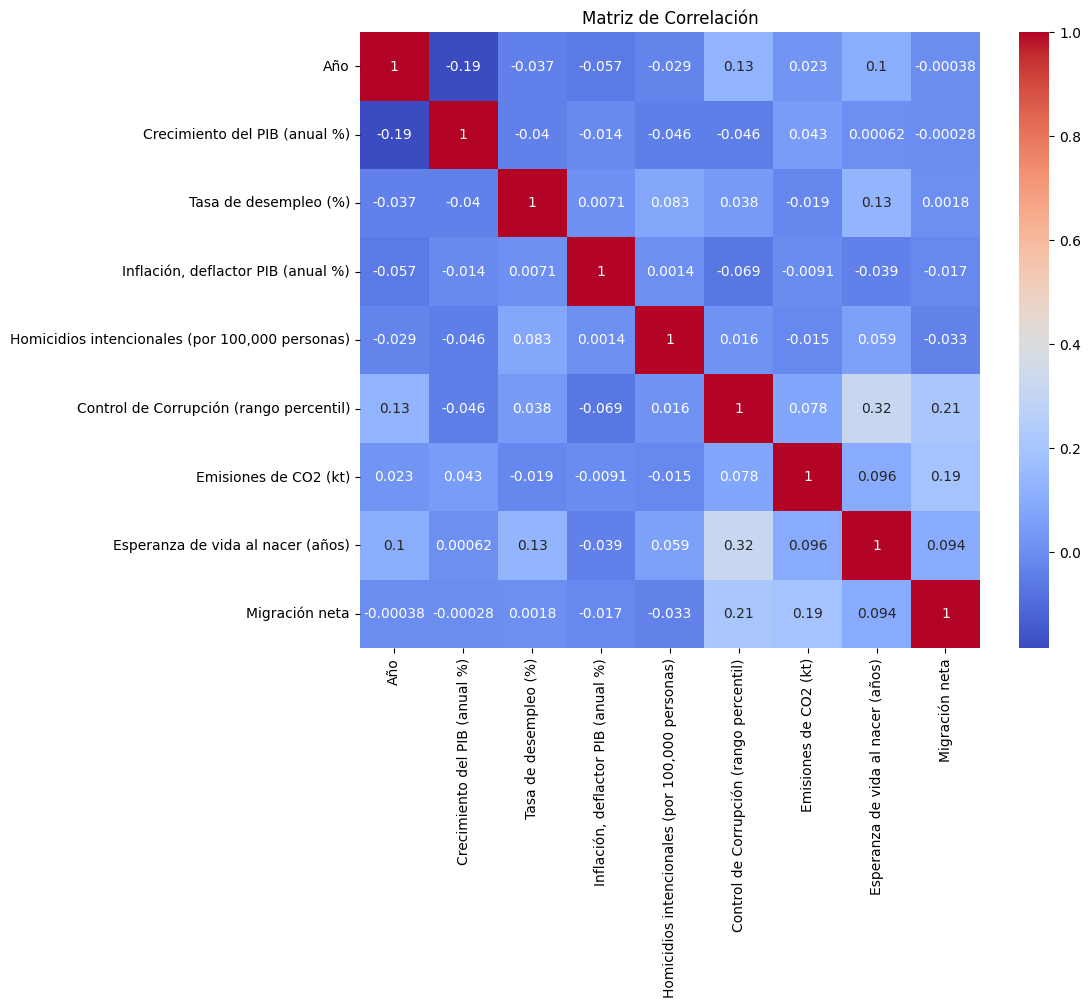

In [95]:

columnas = df.select_dtypes(include=['number'])

correlation_matrix = columnas.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Matriz de Correlación')
plt.show()

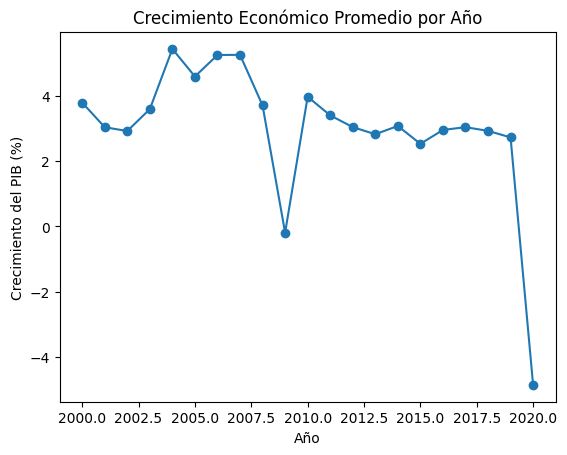

In [94]:
crecimiento_año = df.groupby('Año')['Crecimiento del PIB (anual %)'].mean()

plt.plot(crecimiento_año.index, growth_by_year.values, marker='o')
plt.title('Crecimiento Económico Promedio por Año')
plt.xlabel('Año')
plt.ylabel('Crecimiento del PIB (%)')
plt.show()

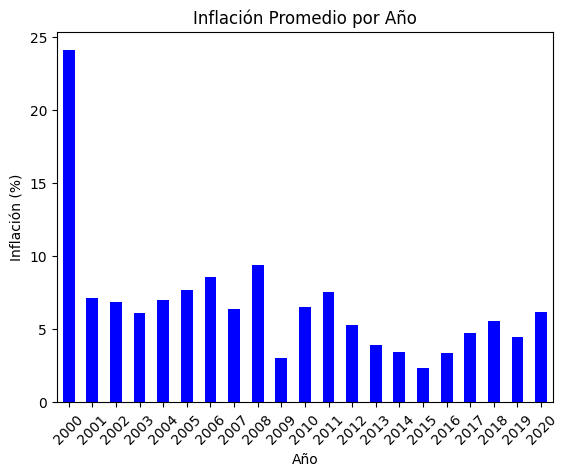

In [64]:
inflacion_año = df.groupby('Año')['Inflación, deflactor PIB (anual %)'].mean()

inflacion_año.plot(kind='bar', color='blue')
plt.title('Inflación Promedio por Año')
plt.xlabel('Año')
plt.ylabel('Inflación (%)')
plt.xticks(rotation=45)
plt.show()


In [62]:
año = 2020
homicidios_año = df[df['Año'] == año].sort_values(by='Homicidios intencionales (por 100,000 personas)', ascending=False)

top_homicidios_countries = homicidios_año.head(10)
top_homicidios_countries[['Country Name', 'Homicidios intencionales (por 100,000 personas)']]

,Country Name,"Homicidios intencionales (por 100,000 personas)"
4448,Jamaica,47.26
4439,Honduras,35.79
4522,South Africa,33.96
4528,St. Vincent and the Grenadines,31.54
4550,"Venezuela, RB",29.43
4351,Mexico,29.19
4526,St. Lucia,29.01
4539,Trinidad and Tobago,26.28
4377,Belize,25.83
4398,Colombia,24.24


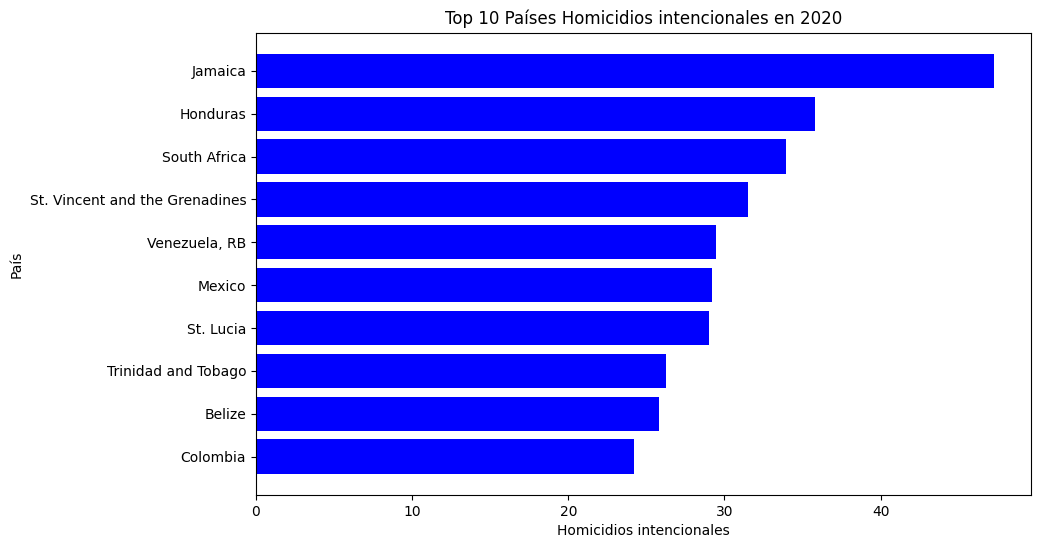

In [72]:
año = 2020
PIB_año = df[df['Año'] == año].sort_values(by='Homicidios intencionales (por 100,000 personas)', ascending=False)

top_PIB_countries = PIB_año.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_PIB_countries['Country Name'], top_PIB_countries['Homicidios intencionales (por 100,000 personas)'], color='blue')
plt.xlabel('Homicidios intencionales')
plt.ylabel('País')
plt.title(f'Top 10 Países Homicidios intencionales en {año}')
plt.gca().invert_yaxis()
plt.show()

In [55]:
año = 2020
PIB_año = df[df['Año'] == año].sort_values(by='Crecimiento del PIB (anual %)', ascending=False)

top_PIB_countries = PIB_año.head(10)
top_PIB_countries[['Country Name', 'Crecimiento del PIB (anual %)']]

,Country Name,Crecimiento del PIB (anual %)
4437,Guyana,43.48
4536,Timor-Leste,31.91
4445,Ireland,6.18
4420,Ethiopia,6.06
4363,American Samoa,5.07
4435,Guinea,4.92
4533,Tajikistan,4.40
4485,Nauru,4.24
4378,Benin,3.85
4414,"Egypt, Arab Rep.",3.55


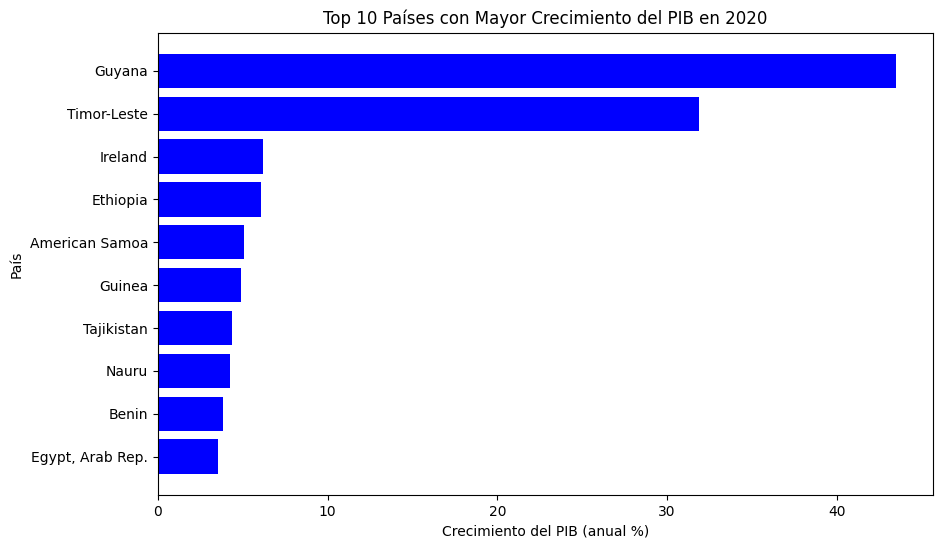

In [68]:
año = 2020
PIB_año = df[df['Año'] == año].sort_values(by='Crecimiento del PIB (anual %)', ascending=False)

top_PIB_countries = PIB_año.head(10)

plt.figure(figsize=(10, 6))
plt.barh(top_PIB_countries['Country Name'], top_PIB_countries['Crecimiento del PIB (anual %)'], color='blue')
plt.xlabel('Crecimiento del PIB (anual %)')
plt.ylabel('País')
plt.title(f'Top 10 Países con Mayor Crecimiento del PIB en {año}')
plt.gca().invert_yaxis()
plt.show()

In [58]:
año = 2020
desempleo_año = df[df['Año'] == año].sort_values(by='Tasa de desempleo (%)', ascending=False)

top_desempleo_country = desempleo_año.head(10)
top_desempleo_country[['Country Name', 'Tasa de desempleo (%)']]

,Country Name,Tasa de desempleo (%)
4410,Djibouti,28.05
4553,West Bank and Gaza,25.89
4419,Eswatini,25.08
4522,South Africa,24.34
4401,"Congo, Rep.",22.52
4425,Gabon,21.73
4484,Namibia,21.24
4383,Botswana,21.02
4528,St. Vincent and the Grenadines,20.55
4526,St. Lucia,20.39


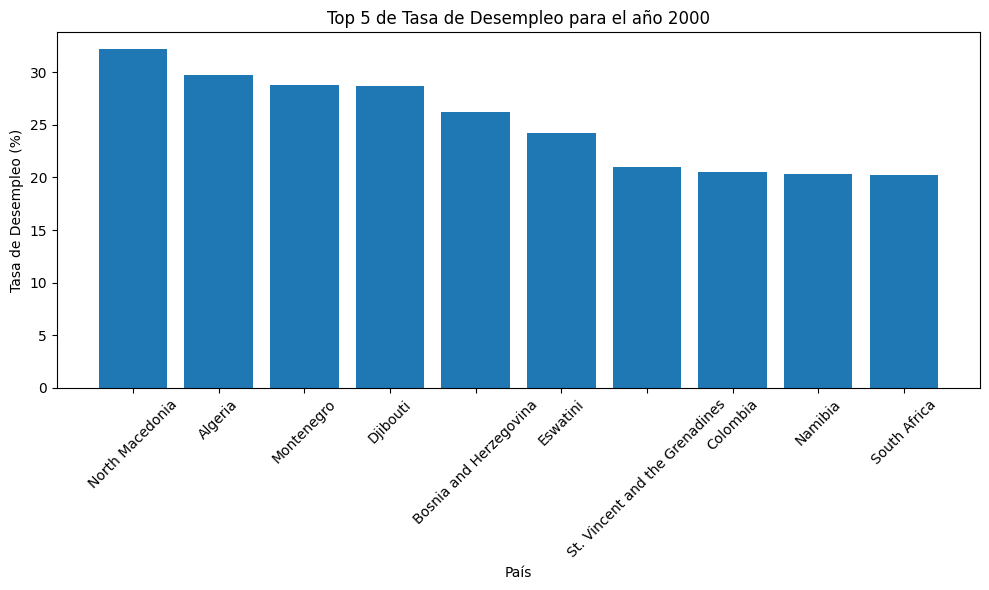

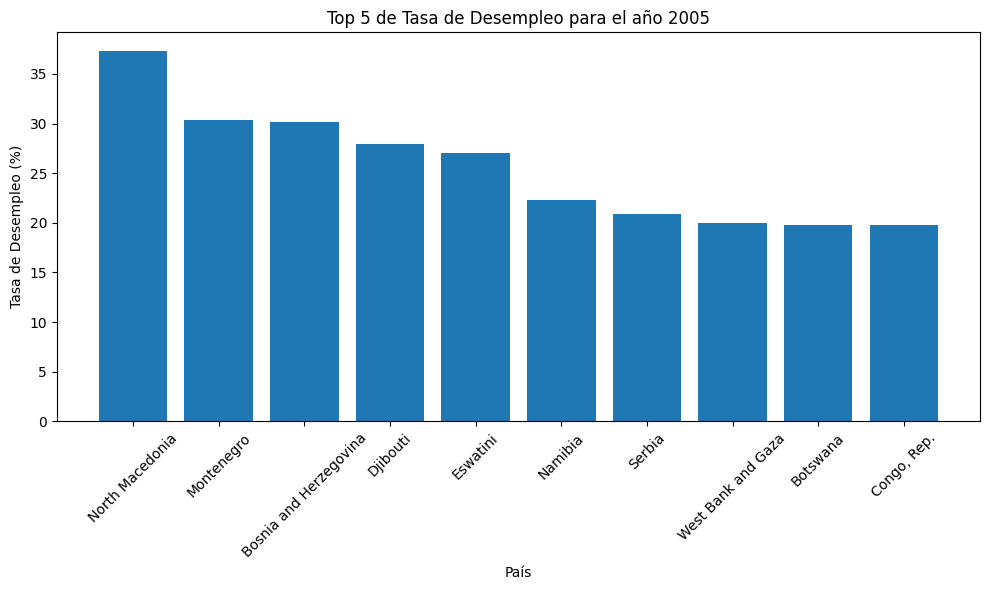

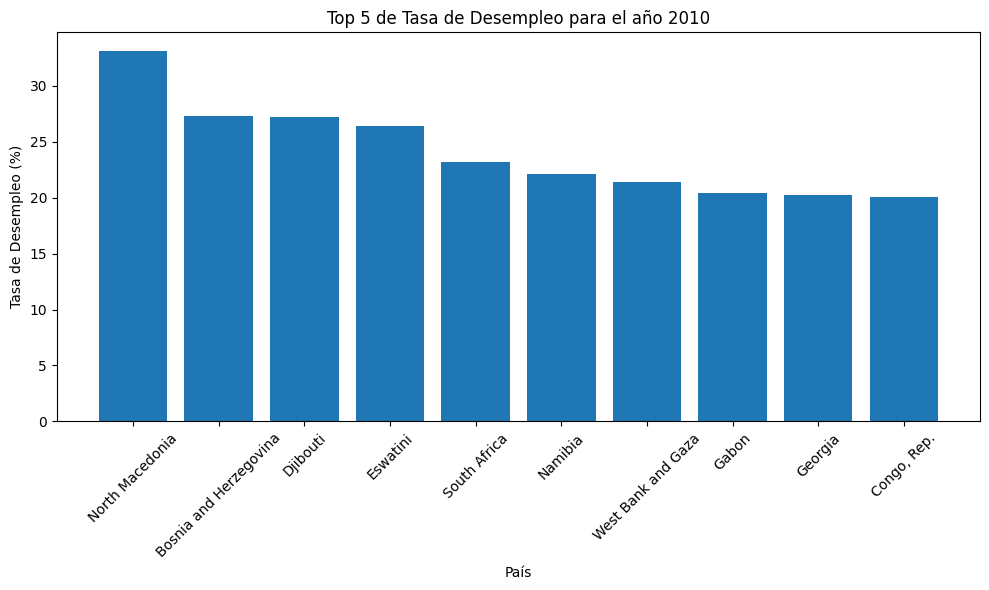

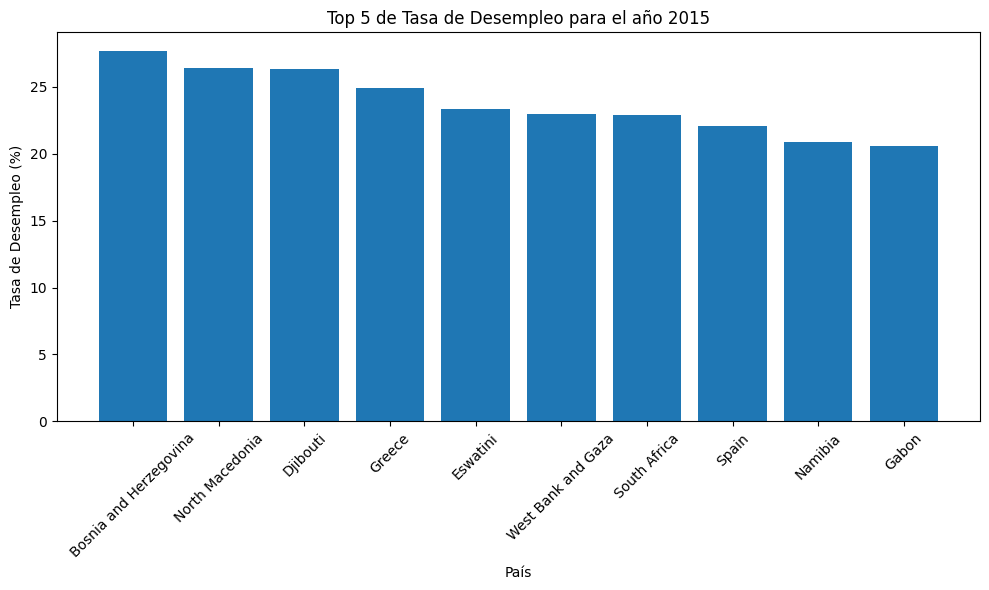

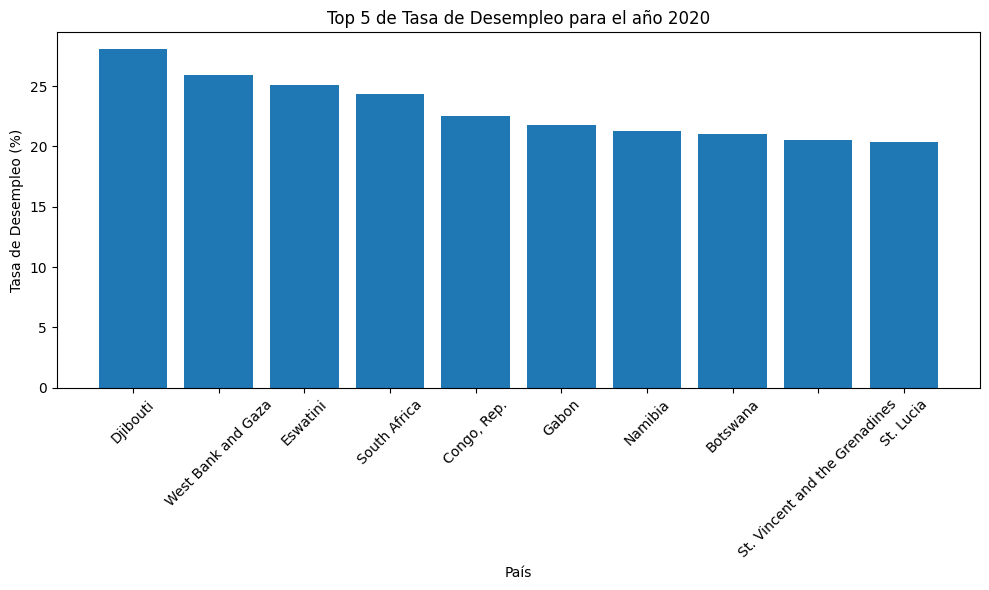

In [48]:
años = [2000, 2005, 2010, 2015, 2020]

top_countries = df[df['Año'].isin(años)].groupby(['Año', 'Country Name'])['Tasa de desempleo (%)'].mean().reset_index()
top_countries = top_countries.groupby('Año').apply(lambda x: x.nlargest(10, 'Tasa de desempleo (%)')).reset_index(drop=True)

for año, año_data in top_countries.groupby('Año'):
    plt.figure(figsize=(10, 6))
    plt.bar(año_data['Country Name'], año_data['Tasa de desempleo (%)'])
    
    plt.title(f'Top 5 de Tasa de Desempleo para el año {año}')
    plt.xlabel('País')
    plt.ylabel('Tasa de Desempleo (%)')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [57]:
año = 2020
migracion_año = df[df['Año'] == año].sort_values(by='Migración neta', ascending=False)

top_migracion = migracion_año.head(10)
top_migracion[['Country Name', 'Migración neta']]

,Country Name,Migración neta
4359,United States,675560.00
4353,Russian Federation,340711.00
4345,Germany,334055.00
4486,Nepal,306664.00
4532,Syrian Arab Republic,270006.00
4398,Colombia,229437.00
4358,United Kingdom,211063.00
4355,Spain,208791.00
4392,Canada,195181.00
4360,Afghanistan,166821.00


C:\Users\miller rodriguez\AppData\Local\Temp\ipykernel_4156\3811675033.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


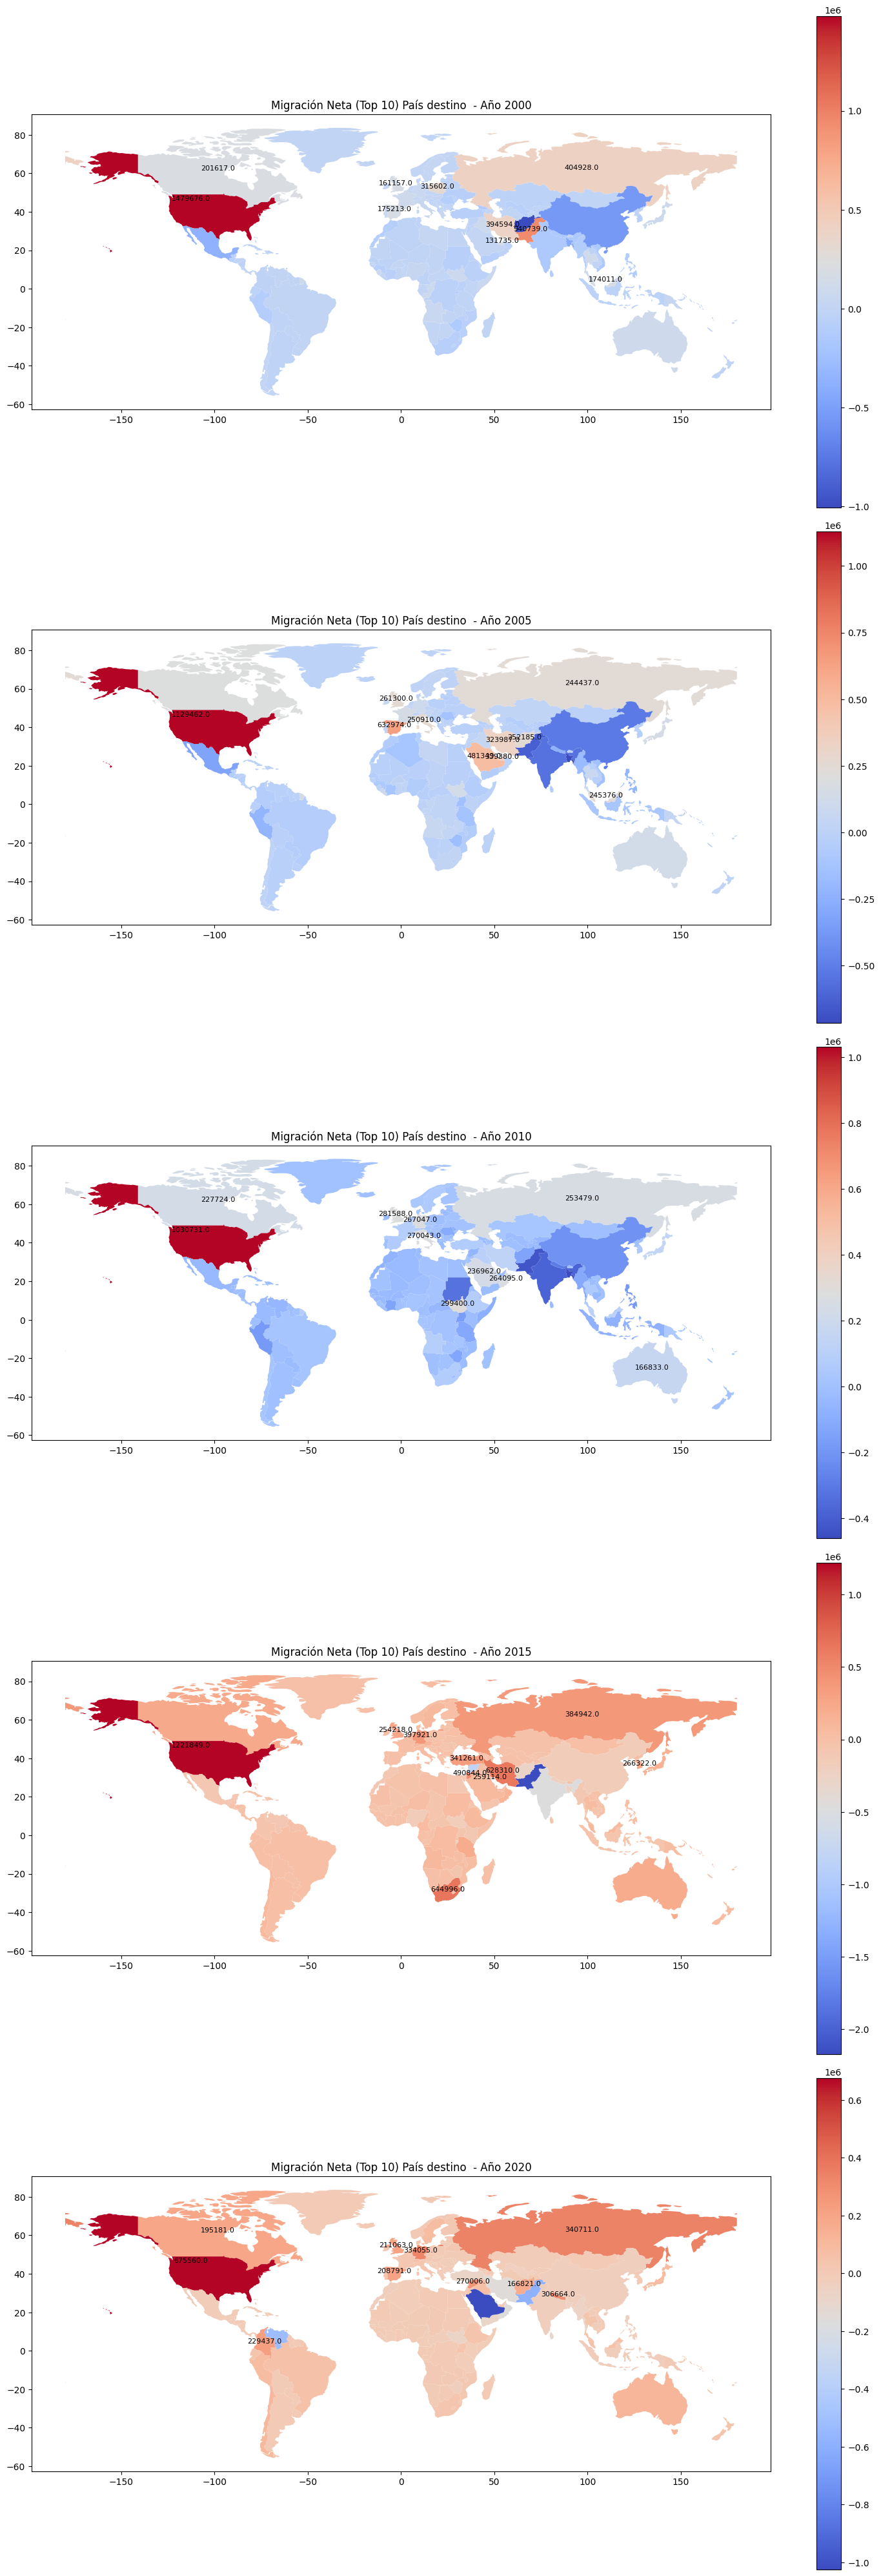

In [37]:
# DataFrame geometría de países
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


años_seleccionados = [2000, 2005, 2010, 2015, 2020]

fig, axes = plt.subplots(len(años_seleccionados), 1, figsize=(15, 8 * len(años_seleccionados)))

for i, año in enumerate(años_seleccionados):
    
    df_año = df[df['Año'] == año]
    
    merged = world.merge(df_año, left_on='iso_a3', right_on='Country Code')

    top_10 = merged.sort_values(by='Migración neta', ascending=False).head(10)
    
    ax = axes[i]
    merged.plot(column='Migración neta', cmap='coolwarm', legend=True, ax=ax)

    for idx, row in top_10.iterrows():
        ax.annotate(text=row['Migración neta'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y), fontsize=8, ha='center')

    ax.set_title(f'Migración Neta (Top 10) País destino  - Año {año}')

plt.tight_layout()
plt.show()

In [56]:
año = 2000
origen_año = df[df['Año'] == año].sort_values(by='Migración neta', ascending=True)

top_migracion_origen = origen_año.head(10)
top_migracion_origen[['Country Name', 'Migración neta']]

,Country Name,Migración neta
20,Afghanistan,-1007135.00
3,China,-549792.00
33,Bangladesh,-424718.00
11,Mexico,-356430.00
211,Vietnam,-150955.00
6,India,-149966.00
146,Nepal,-147403.00
216,Zimbabwe,-137321.00
87,Georgia,-135044.00
162,Philippines,-122971.00


C:\Users\miller rodriguez\AppData\Local\Temp\ipykernel_4156\3613158429.py:2: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


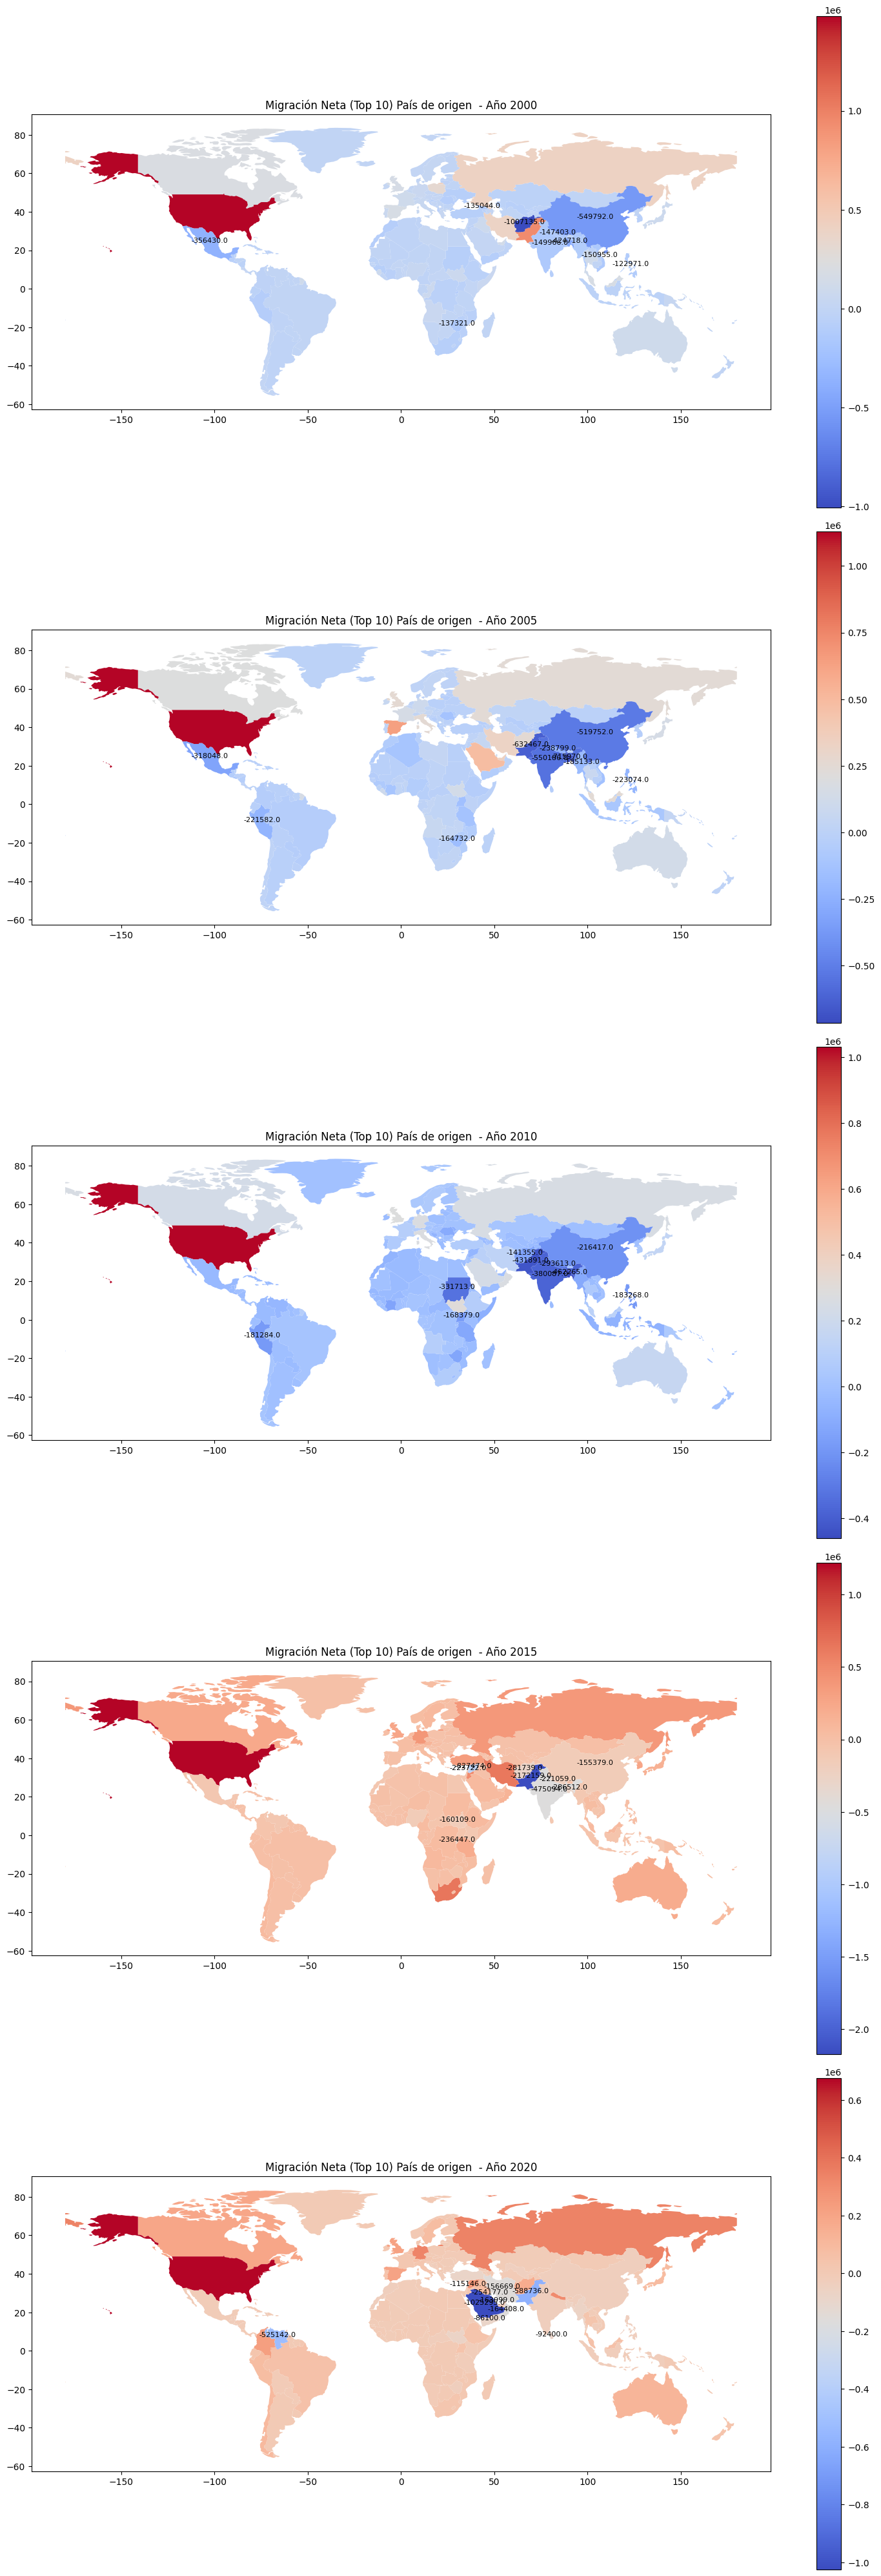

In [33]:
# DataFrame geometría de países
world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


años_seleccionados = [2000, 2005, 2010, 2015, 2020]

fig, axes = plt.subplots(len(años_seleccionados), 1, figsize=(15, 8 * len(años_seleccionados)))

for i, año in enumerate(años_seleccionados):
    
    df_año = df[df['Año'] == año]


    
    merged = world.merge(df_año, left_on='iso_a3', right_on='Country Code')

    top_10 = merged.sort_values(by='Migración neta', ascending=True).head(10)

    
    ax = axes[i]
    merged.plot(column='Migración neta', cmap='coolwarm', legend=True, ax=ax)


    for idx, row in top_10.iterrows():
        ax.annotate(text=row['Migración neta'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y), fontsize=8, ha='center')

    ax.set_title(f'Migración Neta (Top 10) País de origen  - Año {año}')

plt.tight_layout()
plt.show()

C:\Users\miller rodriguez\AppData\Local\Temp\ipykernel_4156\2203170105.py:1: FutureWarning: The geopandas.dataset module is deprecated and will be removed in GeoPandas 1.0. You can get the original 'naturalearth_lowres' data from https://www.naturalearthdata.com/downloads/110m-cultural-vectors/.
  world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


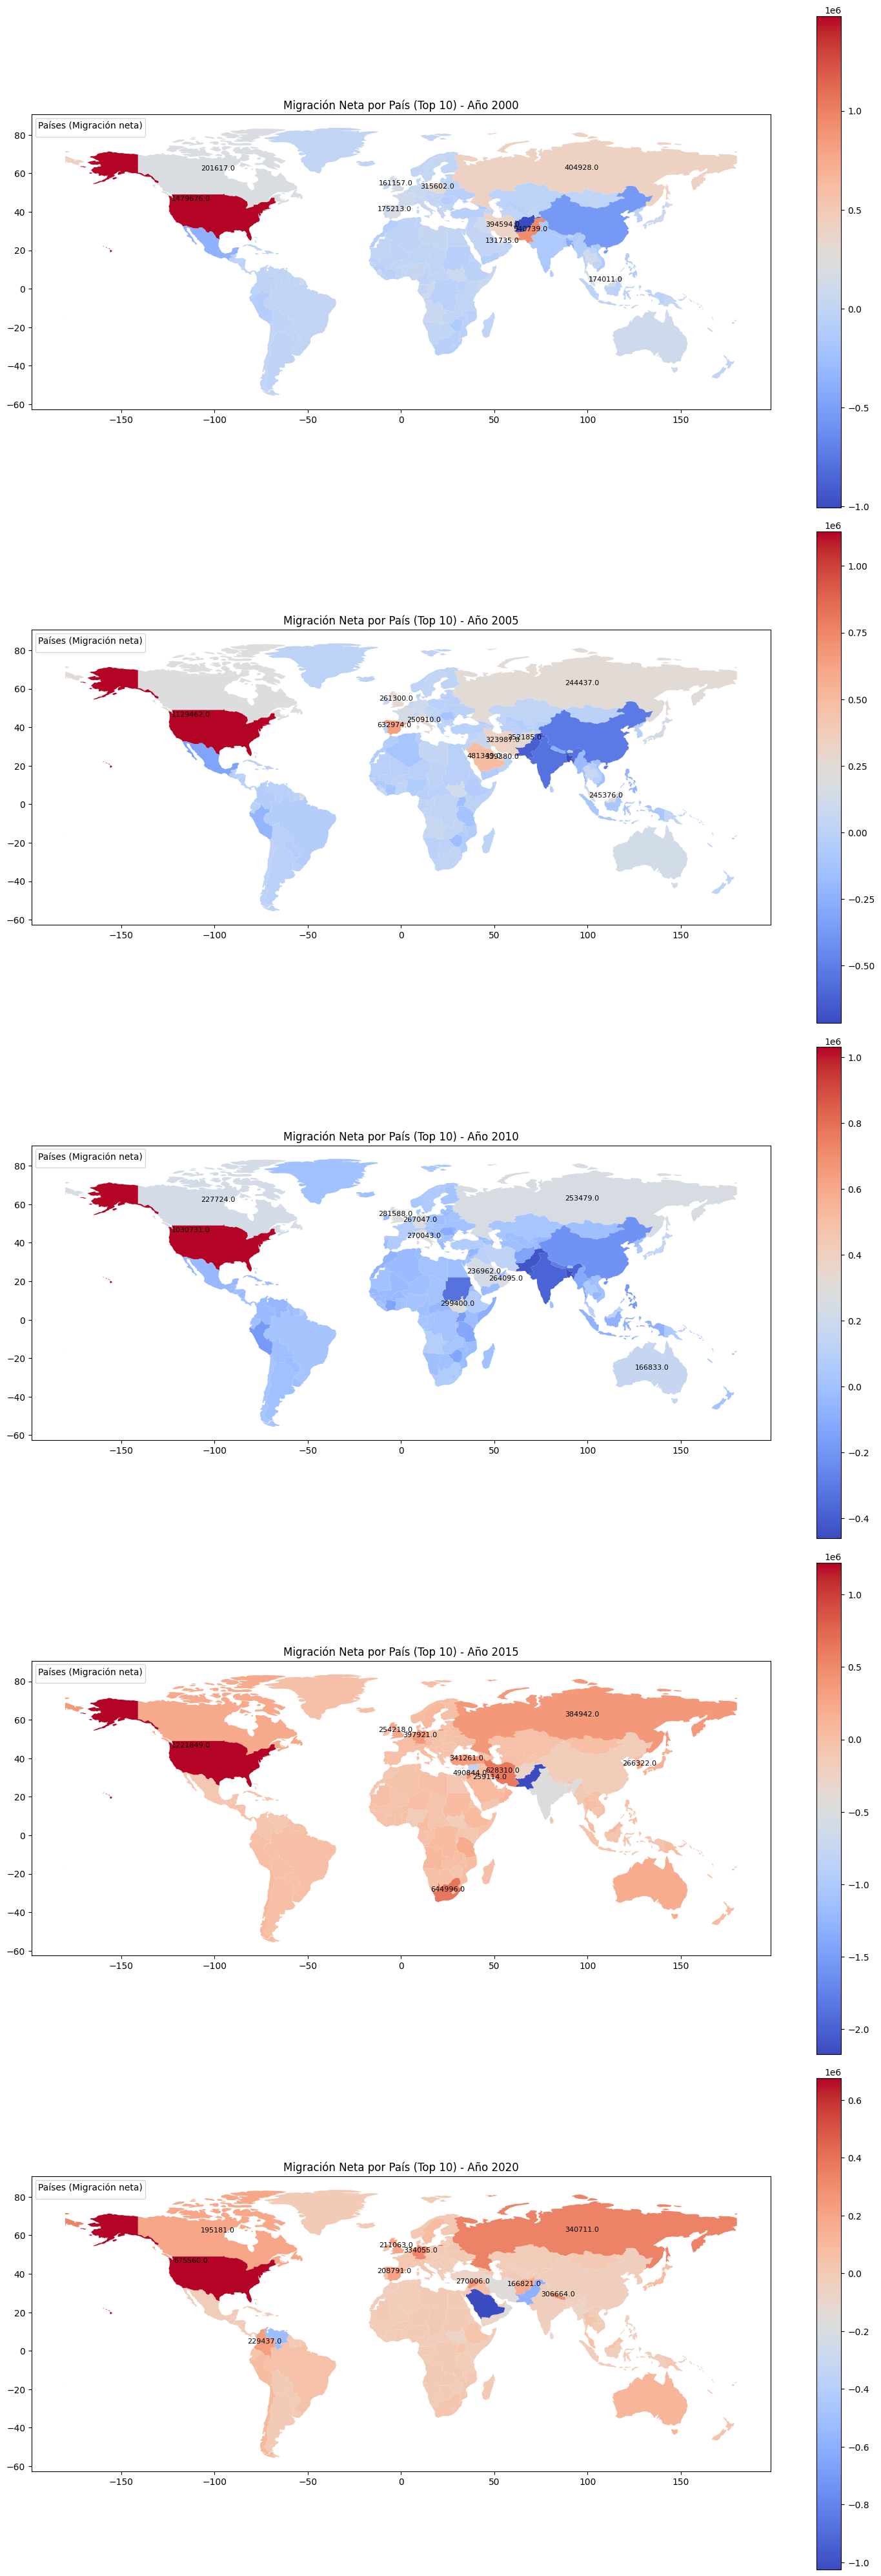

In [98]:

world = gpd.read_file(gpd.datasets.get_path('naturalearth_lowres'))


años_seleccionados = [2000, 2005, 2010, 2015, 2020]

fig, axes = plt.subplots(len(años_seleccionados), 1, figsize=(15, 8 * len(años_seleccionados)))

for i, año in enumerate(años_seleccionados):
 
 
    df_año = df[df['Año'] == año]

   
    merged = world.merge(df_año, left_on='iso_a3', right_on='Country Code')


    top_10 = merged.sort_values(by='Migración neta', ascending=False).head(10)


    ax = axes[i]
    merged.plot(column='Migración neta', cmap='coolwarm', legend=True, ax=ax)

 
    for idx, row in top_10.iterrows():
        ax.annotate(text=row['Migración neta'], xy=(row['geometry'].centroid.x, row['geometry'].centroid.y), fontsize=8, ha='center')


    legend_labels = [f"{row['Country Name']} ({row['Migración neta']})" for idx, row in top_10.iterrows()]
    ax.legend(legend_labels, loc='upper left', fontsize=8, title='Países (Migración neta)')

    ax.set_title(f'Migración Neta por País (Top 10) - Año {año}')

plt.tight_layout()
plt.show()

Durante el análisis realizado sobre los flujos migratorios, se han explorado diversos aspectos fundamentales relacionados con los movimientos poblacionales en diferentes países. El propósito principal ha sido obtener una comprensión profunda de las tendencias generales, los patrones y los factores determinantes que influyen en los desplazamientos de personas en el contexto actual.

A lo largo del análisis, se han destacado varios hallazgos:

Tendencias Globales: Se ha constatado un aumento constante en los flujos migratorios a lo largo de los años, lo que sugiere un fenómeno de alcance global y en constante evolución.

Regiones de Origen y Destino: Se han identificado regiones y países que actúan como puntos de origen y destino para los migrantes. Estos patrones obedecen a una variedad de factores, entre ellos los económicos y sociales, que impulsan los movimientos poblacionales.

Factores Económicos: Se ha observado una relación entre el crecimiento del Producto Interno Bruto (PIB) de un país y la cantidad de inmigrantes que busca establecerse en él. Los países con economías más robustas tienden a atraer a individuos en busca de empleo y oportunidades financieras.

Refugiados y Conflictos: Se ha evidenciado que una porción de los flujos migratorios ocurre en regiones afectadas por conflictos armados y situaciones de crisis.

Distribución de Género: Se ha analizado la distribución de género en los flujos migratorios y se ha observado que las migraciones a menudo involucran tanto a hombres como a mujeres en proporciones similares.

En resumen, el análisis de los datos resalta la naturaleza de los flujos migratorios y cómo su dinámica es moldeada por una diversidad de factores interrelacionados